In [1]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.io import wavfile
import collections

In [2]:
DATA_DIR = "/path/to/downloaded/WHAM/Vox/datasets"
WORKING_DIR = "/path/to/working/dir"

# WHAM Noise

Analyse the metadata of the WHAM Noise test set.

https://wham.whisper.ai/

We did not use the WHAM dataset at all while training our network.

The WHAM Dataset contains an estimate of the SNR of the included recordings.

We only include files with an estimated SNR lower than a certain threshold to remove the probability of there being audible speech in the noise.

In [3]:
# Load test set metadata.
wham_test = pd.read_csv(os.path.join(DATA_DIR, "wham_noise", "metadata", "noise_meta_tt.csv"))
print(f"Number of WHAM test noise files: {len(wham_test):d}")

Number of WHAM test noise files: 3000


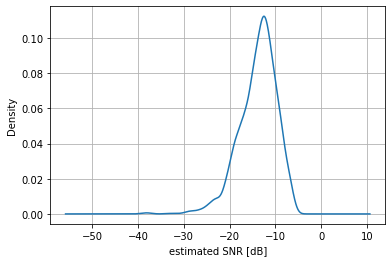

In [4]:
# Plot estimated SNR vavlues.
ax = wham_test["noise_snr"].plot(kind="kde")
ax.set_xlabel("estimated SNR [dB]")
ax.grid()

We decided on a threshld of -12dB. The SNR provided in the WHAM! metadata was obtained using the iZotope RX speech isolation functionality which can result in inaccurate estimates, espcially for very noisy files. 

Using our in-house SNR estimation technique, we observed that specifying an SNR cutoff of -12 leads to most files actually having an SNR below -6dB.

In [5]:
threshold_snr_wham = -12

wham_test = wham_test[wham_test["noise_snr"] <= threshold_snr_wham]
print(f"Number of files with estimated SNR below threshold of {threshold_snr_wham:d}dB: {len(wham_test)}.")

wham_test.head()

Number of files with estimated SNR below threshold of -12dB: 1941.


,utterance_id,noise_file,start_sample_16k,end_sample_16k,noise_snr
0,445c0206_0.60431_22gc0105_-0.60431.wav,CalafiaTaqueria1facingeastat17_2018-11-16_11.4...,10259576,10374514,-19.342613
1,420c020h_1.1139_442c0203_-1.1139.wav,CalafiaTaqueria1facingeastat17_2018-11-16_11.4...,8860058,9035388,-17.904564
2,22go0107_0.079969_051c010u_-0.079969.wav,MakeWesting416minus30fromeast_2018-11-14_20.43...,7877497,8102501,-13.970667
3,444o0314_2.1819_053o020e_-2.1819.wav,WholeFoodsCafeTest1._2018-10-23_15.06.39_T001_...,18044582,18228848,-12.185235
4,423o0304_1.419_420c020x_-1.419.wav,CalafiaTaqueria1facingeastat17_2018-11-16_11.4...,10299938,10448472,-23.142106


Calculate and plot the duraction of all snippets.

In [6]:
# Calculation duration of all snippets.
duration = {}
for index, row in wham_test.iterrows():
    fs, audio_data = wavfile.read(os.path.join(DATA_DIR, "wham_noise", "tt", row["utterance_id"]))
    duration[index] = audio_data.shape[0] / fs

duration = pd.DataFrame.from_dict(duration, orient="index", columns=["duration"])
wham_test = wham_test.join(duration)

print("Min duration:", float(duration.min()))
print("Max duration:", float(duration.max()))
print("Average duration:", float(duration.mean()))
wham_test.head()

/tmp/ipykernel_367/1385469895.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio_data = wavfile.read(os.path.join(DATA_DIR, "wham_noise", "tt", row["utterance_id"]))


Min duration: 4.534625
Max duration: 22.37625
Average duration: 10.775349658681092


,utterance_id,noise_file,start_sample_16k,end_sample_16k,noise_snr,duration
0,445c0206_0.60431_22gc0105_-0.60431.wav,CalafiaTaqueria1facingeastat17_2018-11-16_11.4...,10259576,10374514,-19.342613,7.183625
1,420c020h_1.1139_442c0203_-1.1139.wav,CalafiaTaqueria1facingeastat17_2018-11-16_11.4...,8860058,9035388,-17.904564,10.958125
2,22go0107_0.079969_051c010u_-0.079969.wav,MakeWesting416minus30fromeast_2018-11-14_20.43...,7877497,8102501,-13.970667,14.062750
3,444o0314_2.1819_053o020e_-2.1819.wav,WholeFoodsCafeTest1._2018-10-23_15.06.39_T001_...,18044582,18228848,-12.185235,11.516625
4,423o0304_1.419_420c020x_-1.419.wav,CalafiaTaqueria1facingeastat17_2018-11-16_11.4...,10299938,10448472,-23.142106,9.283375


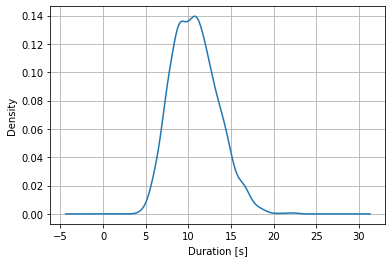

In [7]:
ax = wham_test.duration.plot(kind="kde")
ax.set_xlabel("Duration [s]")
ax.grid()

# VoxCeleb2 speech files

Analyse metadata of the VoxCeleb2 test set.

https://www.robots.ox.ac.uk/~vgg/data/voxceleb/vox2.html

We do not use any samples of the test set of VoxCeleb2 during training of our neural network.

We calculated the duration and the estimated SNR (using our in-house SNR estimation technique) of VoxCeleb2 test set samples and stored this information in a CSV file.

In [8]:
# This csv contains all the files in the test set.
vox2 = pd.read_csv(os.path.join(WORKING_DIR, "estimated_snr_vox2.csv"), header=0)
vox2["speaker_id"] = vox2["file"].map(lambda x: x.split("/")[0])
print("Number of total test examples:", len(vox2))
vox2.head()

Number of total test examples: 36237


,file,snr_estimate,duration,speaker_id
0,id00017/01dfn2spqyE/00001.wav,13.377181,4.288027,id00017
1,id00017/5MkXgwdrmJw/00002.wav,11.646829,7.936009,id00017
2,id00017/7t6lfzvVaTM/00003.wav,21.811348,9.024036,id00017
3,id00017/7t6lfzvVaTM/00004.wav,18.984568,4.928027,id00017
4,id00017/7t6lfzvVaTM/00005.wav,17.977202,5.568027,id00017


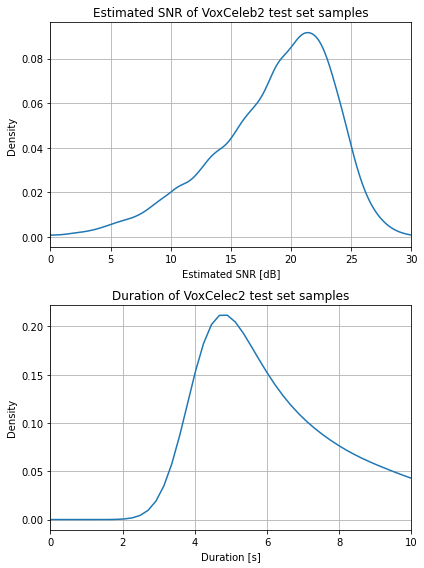

In [9]:
# Plot SNR and duration.
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))
vox2["snr_estimate"].plot(kind="kde", ax=axes[0])
axes[0].grid()
axes[0].set_xlim(0, 30)
axes[0].set_xlabel("Estimated SNR [dB]")
axes[0].set_title("Estimated SNR of VoxCeleb2 test set samples")

vox2["duration"].plot(kind="kde", ax=axes[1])
axes[1].grid()
axes[1].set_xlabel("Duration [s]")
axes[1].set_xlim(0, 10)
axes[1].set_title("Duration of VoxCelec2 test set samples")
fig.tight_layout()

Keep only files from the Vox2 data with high duration and SNR. There are so many that we can afford
to be picky.

In [10]:
# Use these threshold values
threshold_snr_vox2 = 20  # [dB]
minimum_duration = 8  # [seconds]

vox2 = vox2[(vox2["duration"] >= minimum_duration) & (vox2["snr_estimate"] >= threshold_snr_vox2)]
print("Number of samples meeting the requirements:", len(vox2))
print("Number of distinct speakers:", vox2["speaker_id"].nunique())

Number of samples meeting the requirements: 5737
Number of distinct speakers: 116


Plot number of examples per speaker. Some speakers have more examples than others.

Text(0.5, 0, 'Number of examples per speaker')

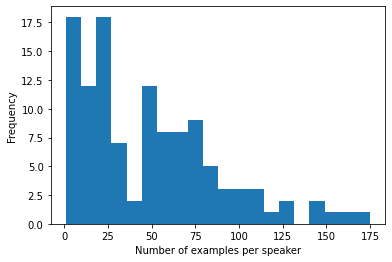

In [11]:
vox2_speakers = vox2.groupby("speaker_id").count()["file"]
fix, *axes = plt.subplots()
vox2_speakers.plot(kind="hist", ax=axes[0], bins=20)
axes[0].set_xlabel("Number of examples per speaker")

Load metadata of speakers. We use this to associate speaker ID with gender and make sure
that in the end we have a gender balanced dataset.

In [12]:
meta = pd.read_csv(os.path.join(WORKING_DIR, "vox2_meta.csv"))
meta = meta.applymap(lambda x: x.strip(" "))
meta.columns = meta.columns.map(lambda x: x.strip(" "))

meta = meta.set_index("VoxCeleb2 ID")
meta = meta[meta.index.isin(set(vox2_speakers.index))]
meta.head()

,VGGFace2 ID,Gender,Set
VoxCeleb2 ID,,,
id00017,n000017,m,test
id00061,n000061,m,test
id00081,n000081,m,test
id00154,n000154,m,test
id00419,n000419,f,test


In [13]:
# Check gender balance of total test set.
gender_balance = (meta.groupby("Gender").count() / len(meta)).iloc[:, 0]
gender_balance

Gender
f    0.327586
m    0.672414
Name: VGGFace2 ID, dtype: float64

# SNR distribution

Try to approximate the distribution from [1]. This is the SNR distribtuion of typical situations people with hearing loss encounter during the day.

#### References:

    [1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5824438/figure/F4/

Text(0.5, 1.0, 'WHAMVox SNR distribution')

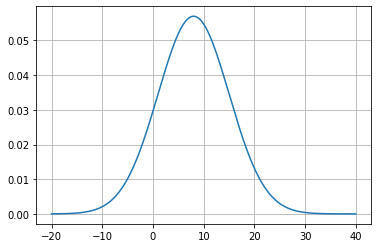

In [14]:
dist = stats.norm(loc=8, scale=7)

x = np.linspace(-20, 40, 1000)
y = dist.pdf(x)

fig, *axes = plt.subplots(nrows=1, ncols=1)
axes[0].plot(x, y)
axes[0].grid()
ax.set_xlabel("SNR [db]")
ax.set_title("WHAMVox SNR distribution")

# WHAMVox

Now we want to select speech files, noise files and SNR values to create the actual WHAMVox eval set.

For the noise files from WHAM, selection is easy. We just take the files from the dataframe.

In [15]:
NUM_SAMPLES = 1941
SEED = 42

prefix_VoxCeleb = "aac"
prefix_WHAM = "tt"

files_WHAM = sorted(wham_test["utterance_id"].tolist())[:NUM_SAMPLES]
rand_WHAM = random.Random(SEED)
rand_WHAM.shuffle(files_WHAM)
print("Number of WHAM files:", len(files_WHAM))

Number of WHAM files: 1941


For the speech from Vox, we want a balanced gender distribution and not too many files from a single speaker.

In [16]:
# Get a separate list of all files for each gender.
vox2_files = vox2.groupby("speaker_id")["file"].apply(list)
vox2_files = vox2_files.to_frame().join(meta["Gender"])
vox2_files = vox2_files.groupby("Gender")["file"].apply(sum).to_frame()
vox2_files["num_files"] = vox2_files["file"].apply(len)
vox2_files

,file,num_files
Gender,,
f,"[id00419/1zffAxBod_c/00006.wav, id00419/3CulyF...",1625
m,"[id00017/7t6lfzvVaTM/00003.wav, id00017/Ktadqx...",4112


In [17]:
# Take all the female files (since there are fewer of them) and then take an equal
# amount of male files. Then shuffle. This does not guarantee a 50/50 split but almost.
files_VoxCeleb = []
files_VoxCeleb += vox2_files.loc["f", "file"]
files_VoxCeleb += vox2_files.loc["m", "file"][:len(files_VoxCeleb)]

rand_vox = random.Random(SEED + 7)
rand_vox.shuffle(files_VoxCeleb)
# We need to replace the extension from wav to m4a because when estimating the SNR, the
# file extension was wav (due to format conversion).
files_VoxCeleb = [file.replace(".wav", ".m4a") for file in files_VoxCeleb]
print("Number of VoxCeleb files:", len(files_VoxCeleb))

Number of VoxCeleb files: 3250


Sample SNR values. These will be the _default_ SNR values, but can be adjusted by
the dataset generation script.

Text(0.5, 1.0, 'WHAMVox sampled SNR values')

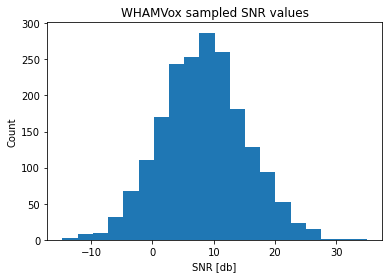

In [18]:
snr_values = dist.rvs(random_state=SEED, size=(NUM_SAMPLES,))
plt.hist(snr_values, bins=20)
ax = plt.gca()
ax.set_xlabel("SNR [db]")
ax.set_ylabel("Count")
ax.set_title("WHAMVox sampled SNR values")

Save file combination to CSV together with gender and suggested SNR.

In [19]:
MixedFile = collections.namedtuple(
    "MixedFile", ("file_noise", "file_speech", "SNR", "gender", "speaker_id")
)

files = []
for i in range(NUM_SAMPLES):

    file_speech = os.path.join(prefix_VoxCeleb, files_VoxCeleb[i])
    file_noise = os.path.join(prefix_WHAM, files_WHAM[i])
    snr = snr_values[i]
    speaker_id = files_VoxCeleb[i].split("/")[0]
    gender = meta.loc[speaker_id, "Gender"]
    files.append(
        MixedFile(
            file_noise=file_noise,
            file_speech=file_speech,
            SNR=snr,
            gender=gender,
            speaker_id=speaker_id
        )
    )

files = pd.DataFrame(files)
files.head()

,file_noise,file_speech,SNR,gender,speaker_id
0,tt/445c020w_0.87572_22ga010s_-0.87572.wav,aac/id00017/gjYcaCzo7UU/00107.m4a,11.476999,m,id00017
1,tt/22ga010x_0.48458_22ho0107_-0.48458.wav,aac/id02019/X3FCAoFnmdA/00130.m4a,7.032150,m,id02019
2,tt/051a050o_1.2715_443o030c_-1.2715.wav,aac/id02086/1cJl_a8WpuY/00022.m4a,12.533820,f,id02086
3,tt/22ha0114_0.35843_441o030e_-0.35843.wav,aac/id02057/CI5-q_qTR5I/00112.m4a,18.661209,m,id02057
4,tt/442c020n_1.8408_444o030k_-1.8408.wav,aac/id01593/NuGK5k5cpoA/00279.m4a,6.360926,m,id01593


In [20]:
# Add the URL to the youtube videos from which the speech snippets are extracted. This is mostly for reference.
files['speech_youtube_url'] = files.file_speech.apply(lambda x: "https://www.youtube.com/watch?v="+x.split('/')[2])
files.head()

,file_noise,file_speech,SNR,gender,speaker_id,speech_youtube_url
0,tt/445c020w_0.87572_22ga010s_-0.87572.wav,aac/id00017/gjYcaCzo7UU/00107.m4a,11.476999,m,id00017,https://www.youtube.com/watch?v=gjYcaCzo7UU
1,tt/22ga010x_0.48458_22ho0107_-0.48458.wav,aac/id02019/X3FCAoFnmdA/00130.m4a,7.032150,m,id02019,https://www.youtube.com/watch?v=X3FCAoFnmdA
2,tt/051a050o_1.2715_443o030c_-1.2715.wav,aac/id02086/1cJl_a8WpuY/00022.m4a,12.533820,f,id02086,https://www.youtube.com/watch?v=1cJl_a8WpuY
3,tt/22ha0114_0.35843_441o030e_-0.35843.wav,aac/id02057/CI5-q_qTR5I/00112.m4a,18.661209,m,id02057,https://www.youtube.com/watch?v=CI5-q_qTR5I
4,tt/442c020n_1.8408_444o030k_-1.8408.wav,aac/id01593/NuGK5k5cpoA/00279.m4a,6.360926,m,id01593,https://www.youtube.com/watch?v=NuGK5k5cpoA


Verify that gender balance is okay.

In [21]:
files.groupby(["gender"]).nunique()

,file_noise,file_speech,SNR,speaker_id,speech_youtube_url
gender,,,,,
f,968,968,968,37,389
m,973,973,973,32,388


In [22]:
# Save to CSV
files.to_csv(os.path.join(WORKING_DIR, "WHAMVox_test.csv"), index=False)